<a href="https://colab.research.google.com/github/georgea03/ML1/blob/main/ProiectBigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Predicția Afectiunilor Tiroidiene cu Ajutorul Metodelor de Învățare Automata***

In [ ]:
import pandas as pd

df = pd.read_csv('thyroidDF.csv')

df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


În urma unei analize asupra coloanelor si relevantei fiecareia atat din punct de vedere tehnic cat si medical, am ales sa folosim doar o parte din coloane, cele care sunt relevante pentru modelul nostru. Acestea sunt 'TSH', 'T3', 'FTI', 'TT4', 'T4U','TBG' , și 'age'

In [ ]:
features = ["TSH", "T3", "FTI", "TT4", "T4U", "TBG", "age", "target"]
df = df[features]

Verificarea valorilor lipsa din fiecare coloana

In [ ]:
df.isnull().sum()


,0
TSH,842
T3,2604
FTI,802
TT4,442
T4U,809
TBG,8823
age,0
target,0


In [ ]:

df = df.drop(columns=['TBG'])


Completăm valorile lipsă numerice cu media

In [ ]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())


Verificam daca mai exista valori nule

In [ ]:
df.isnull().sum()


,0
TSH,0
T3,0
FTI,0
TT4,0
T4U,0
age,0
target,0


Transformam target intr-o variabila binara

In [ ]:
df['target'] = df['target'].astype(str).str.strip().apply(lambda x: 0 if x == '-' else 1)

Construim boxploturi ca sa analizam relatiile dintre variabila dependenta si cele independente.

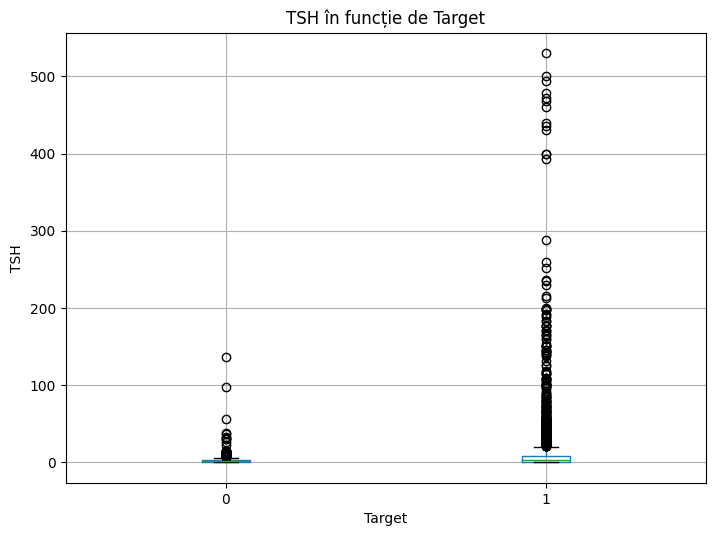

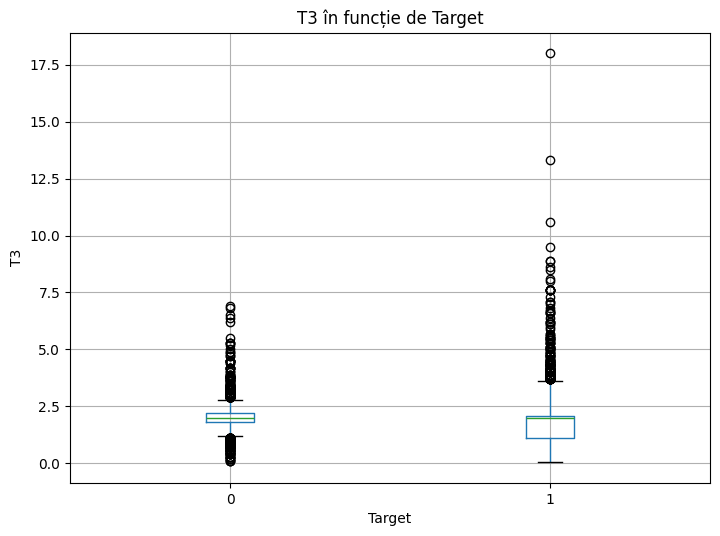

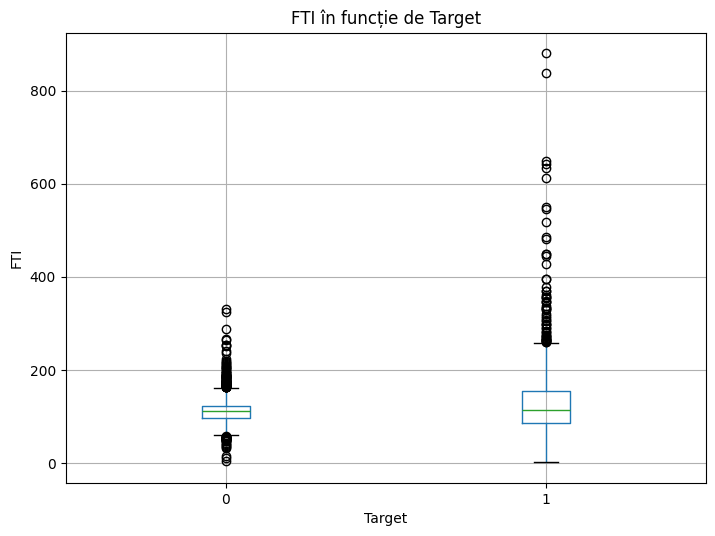

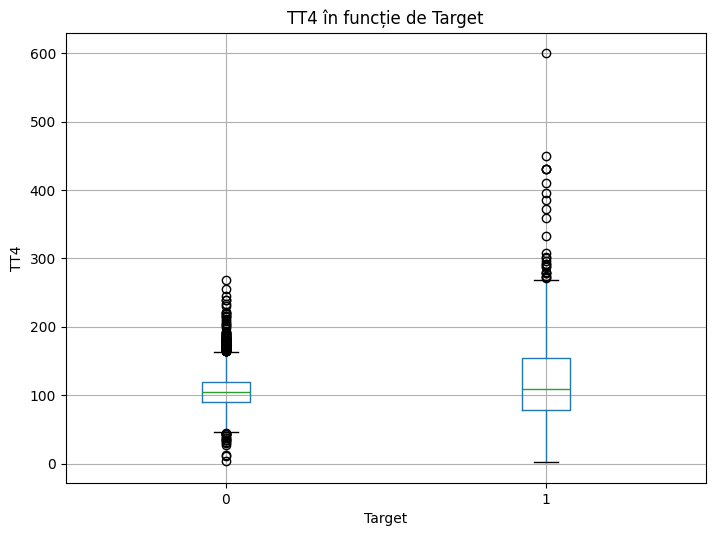

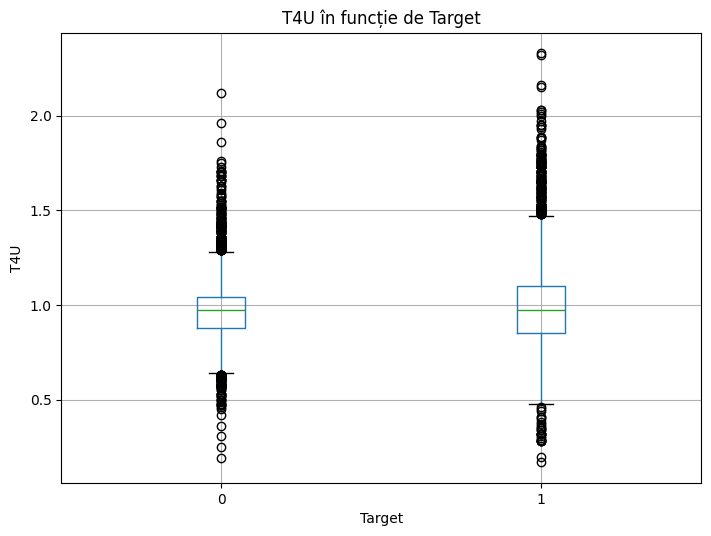

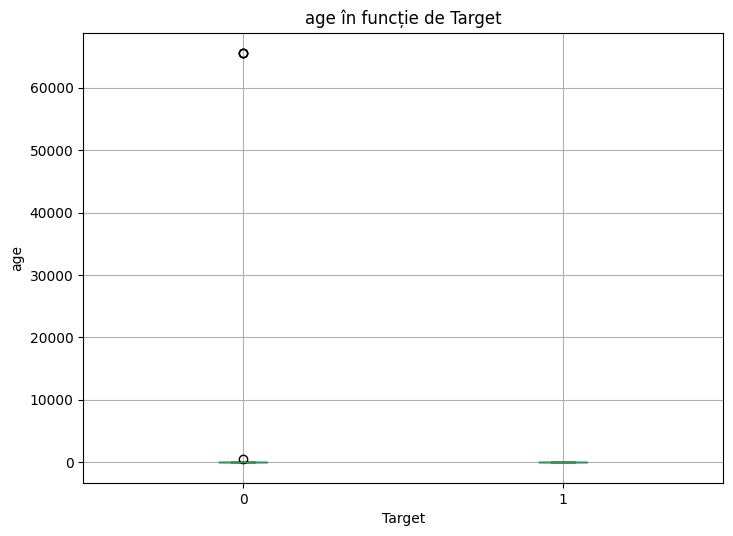

In [ ]:
import matplotlib.pyplot as plt

numeric_cols = ['TSH', 'T3', 'FTI', 'TT4', 'T4U', 'age']

for col in numeric_cols:
    fig, ax = plt.subplots(figsize=(8, 6))
    df.boxplot(column=col, by='target', ax=ax)
    ax.set_title(f'{col} în funcție de Target')
    ax.set_xlabel('Target')
    ax.set_ylabel(col)
    plt.suptitle('')
    plt.grid(True)
    plt.show()


Am remarcat prezenta unor outliers asa ca limităm valorile extreme la percentila 1% și 99%, astfel încât să reducem impactul outlierilor asupra modelului.

In [ ]:
import numpy as np


cols_with_outliers = ['FTI', 'TT4', 'T3', 'age']

for col in cols_with_outliers:
    upper_limit = df[col].quantile(0.99)
    lower_limit = df[col].quantile(0.01)
    df[col] = np.clip(df[col], lower_limit, upper_limit)


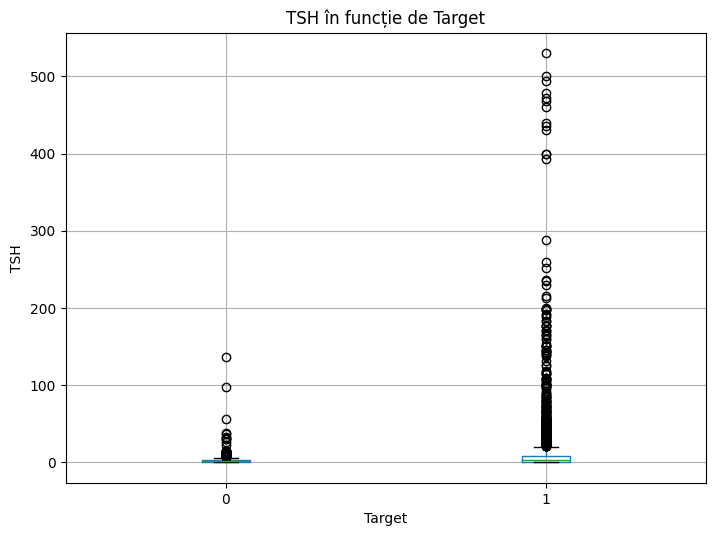

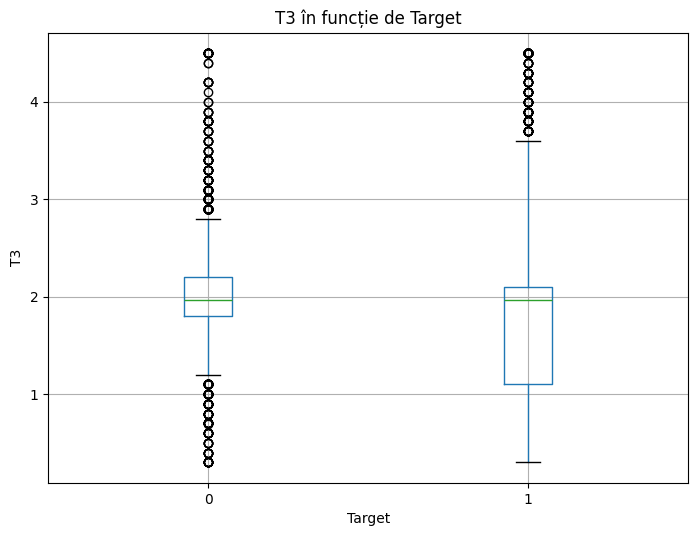

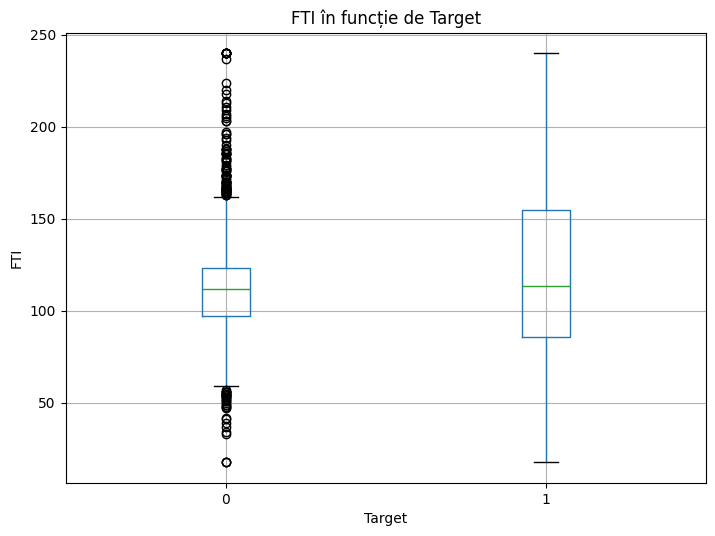

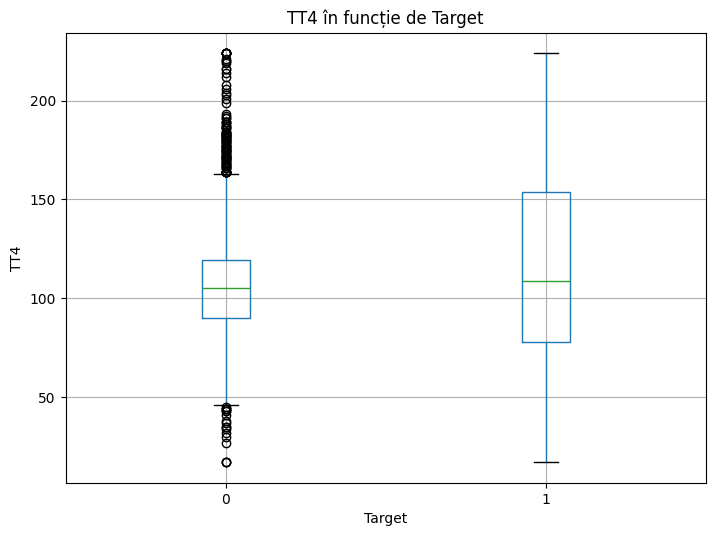

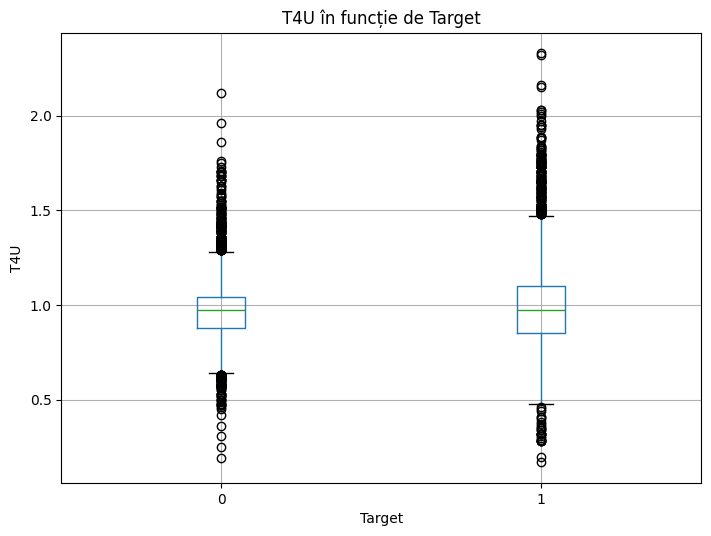

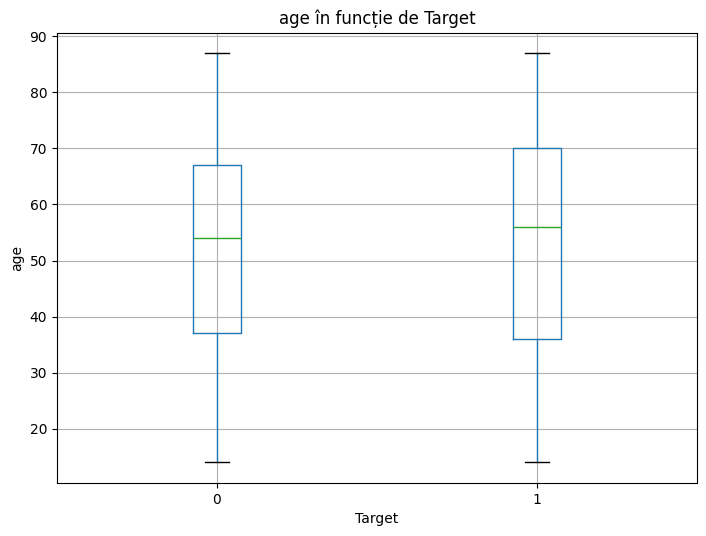

In [ ]:
import matplotlib.pyplot as plt

numeric_cols = ['TSH', 'T3', 'FTI', 'TT4', 'T4U', 'age']

for col in numeric_cols:
    fig, ax = plt.subplots(figsize=(8, 6))
    df.boxplot(column=col, by='target', ax=ax)
    ax.set_title(f'{col} în funcție de Target')
    ax.set_xlabel('Target')
    ax.set_ylabel(col)
    plt.suptitle('')
    plt.grid(True)
    plt.show()


## **Proportia dintre clase**

Observam ca avem un dezechilibru moderat(74% pacienti sanatosi)

In [ ]:
df['target'].value_counts(normalize=True)


,proportion
target,
0,0.738225
1,0.261775


## **Împărțirea setului de date**

Impartim setul in set de test si set de antrenament cu stratify(deoarece avem un dezechilibru moderat intre clase si atunci e posibil ca modelul de regresie sa favorizeze doar una dintre clase)

In [ ]:
from sklearn.model_selection import train_test_split

features = ["TSH", "T3", "FTI", "TT4", "T4U", "age"]
X = df[features]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **2.Regresie logistica**


Rezultate medii (cross-validation):
Accuratete medie: 0.7425371803658692
Senzitivitate medie: 0.7194291125541126
Media scorului pentru Curba Roc: 0.7939700029355518

 Rezultate pe setul de test
Acuratete: 0.7520435967302452
Raport de Clasificare:
               precision    recall  f1-score   support

           0       0.89      0.75      0.82      1355
           1       0.52      0.74      0.61       480

    accuracy                           0.75      1835
   macro avg       0.71      0.75      0.71      1835
weighted avg       0.79      0.75      0.76      1835

Matrice de confuzie:
 [[1023  332]
 [ 123  357]]
Scor Curba ROC: 0.7942489237392374


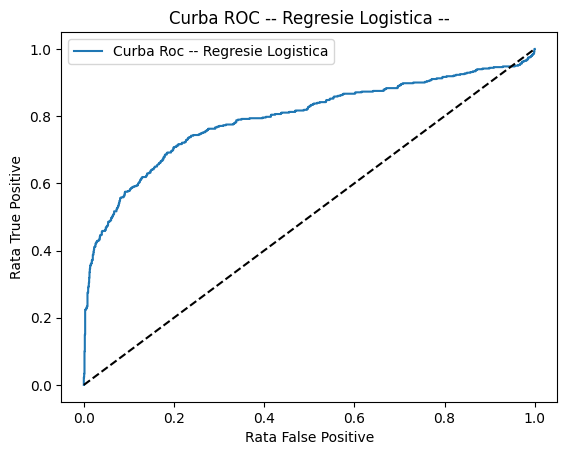


P-values ale coeficienților:
const: 0.000000
TSH: 0.000000
T3: 0.000000
FTI: 0.000000
TT4: 0.177268
T4U: 0.000000
age: 0.011172


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, roc_curve
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


X = pd.DataFrame(X)
y = pd.Series(y)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


accuracies = []
recalls = []
roc_aucs = []


X_train_copy = X_train.copy()
y_train_copy = y_train.copy()


for train_index, val_index in kf.split(X_train_copy, y_train_copy):


    X_tr = X_train_copy.iloc[train_index]
    X_val = X_train_copy.iloc[val_index]
    y_tr = y_train_copy.iloc[train_index]
    y_val = y_train_copy.iloc[val_index]

    X_tr_const = sm.add_constant(pd.DataFrame(X_tr))
    X_val_const = sm.add_constant(pd.DataFrame(X_val), has_constant='add')

    model = sm.Logit(y_tr, X_tr_const).fit(disp=0)


    y_pred_prob = model.predict(X_val_const)
    y_pred = (y_pred_prob >= 0.25).astype(int)


    accuracies.append(accuracy_score(y_val, y_pred))
    recalls.append(recall_score(y_val, y_pred))
    roc_aucs.append(roc_auc_score(y_val, y_pred_prob))


print("\nRezultate medii (cross-validation):")
print("Accuratete medie:", np.mean(accuracies))
print("Senzitivitate medie:", np.mean(recalls))
print("Media scorului pentru Curba Roc:", np.mean(roc_aucs))




X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test, has_constant='add')

final_model = sm.Logit(y_train, X_train_const).fit(disp=0)
y_test_prob = final_model.predict(X_test_const)
y_test_pred = (y_test_prob >= 0.25).astype(int)

print("\n Rezultate pe setul de test")
print("Acuratete:", accuracy_score(y_test, y_test_pred))
print("Raport de Clasificare:\n", classification_report(y_test, y_test_pred))
print("Matrice de confuzie:\n", confusion_matrix(y_test, y_test_pred))
print("Scor Curba ROC:", roc_auc_score(y_test, y_test_prob))


fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label='Curba Roc -- Regresie Logistica')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Rata False Positive')
plt.ylabel('Rata True Positive')
plt.title('Curba ROC -- Regresie Logistica --')
plt.legend()
plt.show()

print("\nP-values ale coeficienților:")
for var, pval in final_model.pvalues.items():
    print(f"{var}: {format(pval, '.6f')}")



## **2. Arbore de decizie**


Rezultate medii pe VALIDARE (5-Fold)
Acuratete medie:      0.9141
Senzitivitate medie: 0.8464
Scor mediu Curba ROC:       0.9174

 Evaluare pe SETUL DE TEST 
Acuratete: 0.9313351498637602
Senzitivitate: 0.8854166666666666
Scor Curba ROC: 0.9365467404674046
Raport Clasificare:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1355
           1       0.86      0.89      0.87       480

    accuracy                           0.93      1835
   macro avg       0.91      0.92      0.91      1835
weighted avg       0.93      0.93      0.93      1835

Matrice de confuzie:
 [[1284   71]
 [  55  425]]


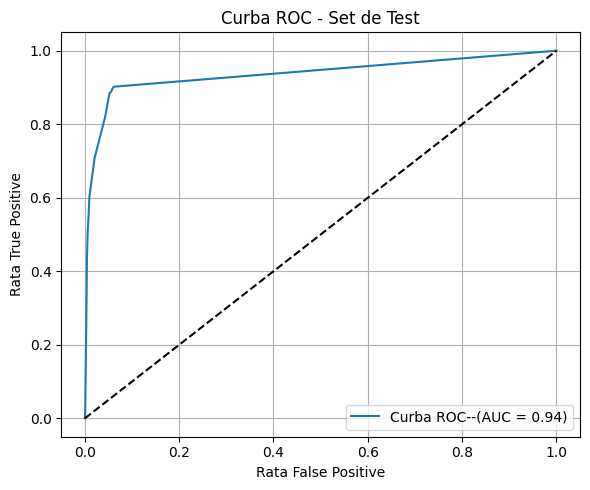

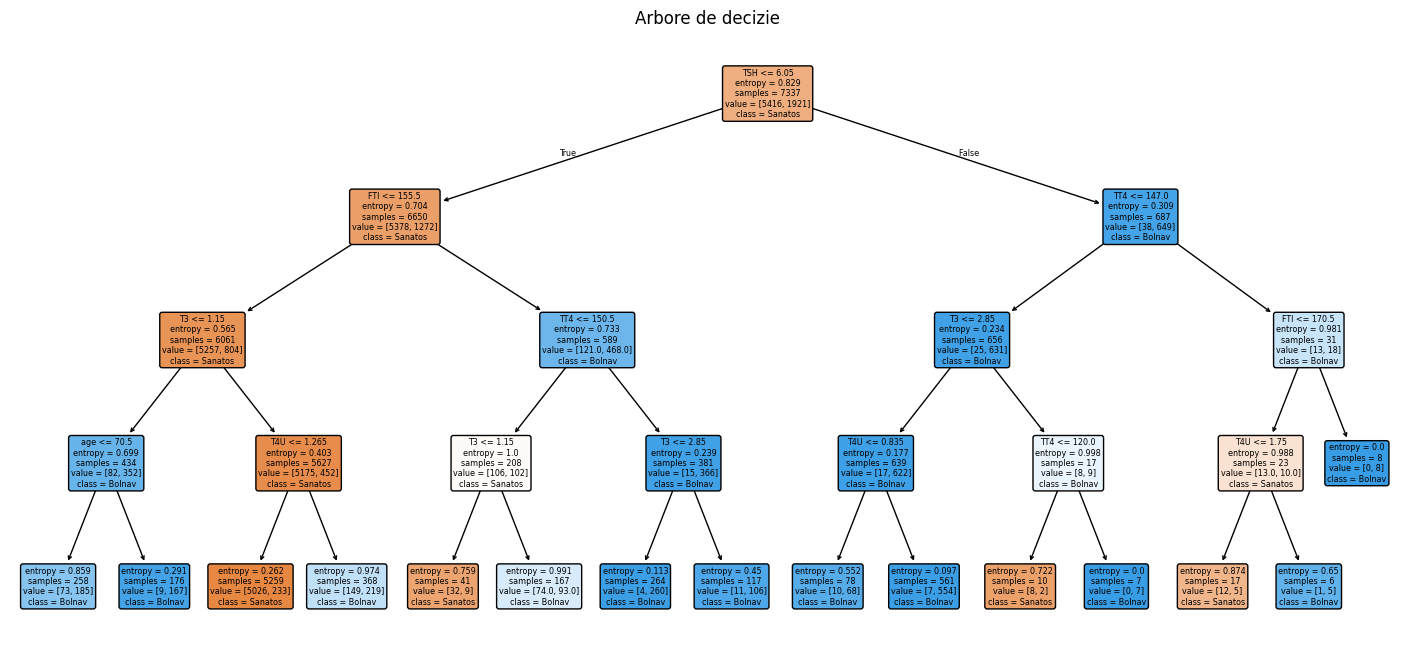

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import numpy as np


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=35)
accuracy_scores = []
sensitivity_scores = []
roc_auc_scores = []

for train_index, val_index in kf.split(X_train, y_train):
    X_tr = X_train.iloc[train_index][features]
    X_val = X_train.iloc[val_index][features]
    y_tr = y_train.iloc[train_index]
    y_val = y_train.iloc[val_index]


    model = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=4,
        min_samples_leaf=5,
        min_samples_split=10,
        random_state=35
    )
    model.fit(X_tr, y_tr)

    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)[:, 1]

    accuracy_scores.append(accuracy_score(y_val, y_val_pred))
    sensitivity_scores.append(recall_score(y_val, y_val_pred))
    roc_auc_scores.append(roc_auc_score(y_val, y_val_prob))

print("\nRezultate medii pe VALIDARE (5-Fold)")
print(f"Acuratete medie:      {np.mean(accuracy_scores):.4f}")
print(f"Senzitivitate medie: {np.mean(sensitivity_scores):.4f}")
print(f"Scor mediu Curba ROC:       {np.mean(roc_auc_scores):.4f}")


final_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=35
)
final_model.fit(X_train[features], y_train)

y_test_pred = final_model.predict(X_test[features])
y_test_prob = final_model.predict_proba(X_test[features])[:, 1]

print("\n Evaluare pe SETUL DE TEST ")
print("Acuratete:", accuracy_score(y_test, y_test_pred))
print("Senzitivitate:", recall_score(y_test, y_test_pred))
print("Scor Curba ROC:", roc_auc_score(y_test, y_test_prob))
print("Raport Clasificare:\n", classification_report(y_test, y_test_pred))
print("Matrice de confuzie:\n", confusion_matrix(y_test, y_test_pred))


fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='Curba ROC--(AUC = {:.2f})'.format(roc_auc_score(y_test, y_test_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Rata False Positive')
plt.ylabel('Rata True Positive')
plt.title('Curba ROC - Set de Test')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 8))
plot_tree(
    final_model,
    feature_names=features,
    class_names=['Sanatos', 'Bolnav'],
    filled=True,
    rounded=True
)
plt.title("Arbore de decizie")
plt.show()


### **3.Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score
import matplotlib.pyplot as plt


param_grid = {
    'criterion': ['entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [10, 20],
    'max_features': [2],
    'n_estimators': [100]
}


rf = RandomForestClassifier(random_state=35)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)


y_pred = grid_search.predict(X_test)
y_prob = grid_search.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
print("Cei mai buni parametrii:")
print(grid_search.best_params_)


Cei mai buni parametrii:
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 20, 'n_estimators': 100}


In [ ]:

grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=2,
                       min_samples_leaf=20, random_state=35)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


import copy
bparam = copy.deepcopy(grid_search.best_params_)
bparam['random_state'] = 35

best_model = RandomForestClassifier(**bparam)


best_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=2,
                       min_samples_leaf=20, random_state=35)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

y_train_pred = best_model.predict(X_train)
y_train_prob = best_model.predict_proba(X_train)[:, 1]

train_acc = accuracy_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_prob)

print("Performanta pe setul de antrenament")
print("Acuratete:", train_acc)
print("Recall:", train_rec)
print("Curba ROC:", train_auc)


Performanta pe setul de antrenament
Acuratete: 0.9171323429194493
Recall: 0.76730869338886
Curba ROC: 0.9614530221442704


Acuratete: 0.9133514986376022

Raport de Clasificare
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1355
           1       0.89      0.76      0.82       480

    accuracy                           0.91      1835
   macro avg       0.91      0.86      0.88      1835
weighted avg       0.91      0.91      0.91      1835

Matrice de confuzie
[[1311   44]
 [ 115  365]]
Scor Curba Roc: 0.9655896371463714


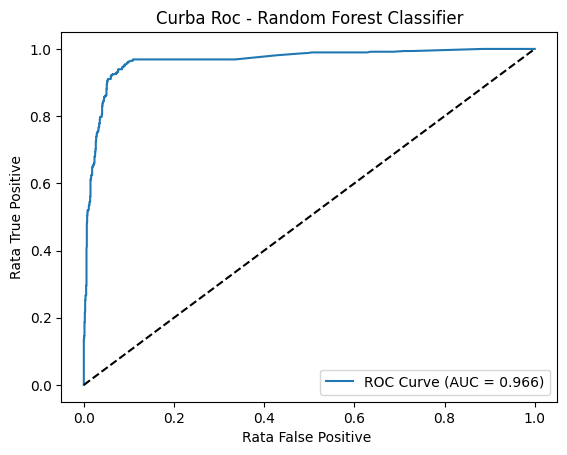

In [ ]:

y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

print("Acuratete:", accuracy_score(y_test, y_pred))

print("\nRaport de Clasificare")
print(classification_report(y_test, y_pred))

print("Matrice de confuzie")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("Scor Curba Roc:", roc_auc)


fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Rata False Positive ')
plt.ylabel('Rata True Positive')
plt.title('Curba Roc - Random Forest Classifier')
plt.legend()
plt.show()


In [ ]:
import pandas as pd


importances = best_model.feature_importances_


feature_names = X_train.columns


feat_imp = pd.Series(importances, index=feature_names)
feat_imp = feat_imp.sort_values(ascending=False)


print("Importanța trăsăturilor (descrescător):\n")
print(feat_imp)


Importanța trăsăturilor (descrescător):

TSH    0.355091
T3     0.218061
FTI    0.205206
TT4    0.153240
T4U    0.062606
age    0.005795
dtype: float64


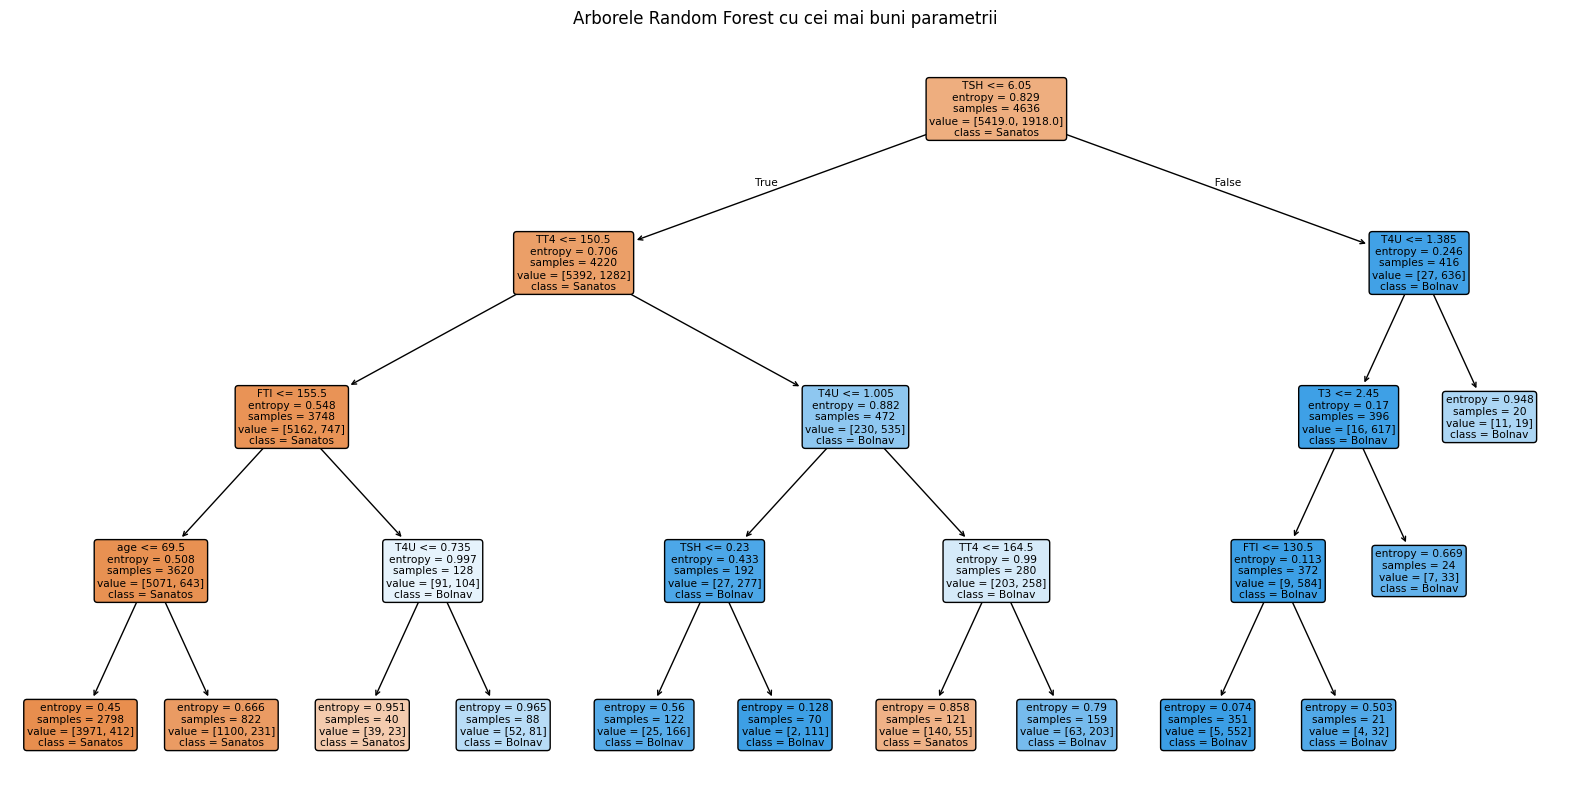

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


estimator = grid_search.best_estimator_.estimators_[0]


plt.figure(figsize=(20, 10))
plot_tree(
    estimator,
    feature_names=features,
    class_names=['Sanatos', 'Bolnav'],
    filled=True,
    rounded=True
)
plt.title("Arborele Random Forest cu cei mai buni parametrii")
plt.show()
